# Reading FITS Files

In [54]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [55]:
plt.rcParams['figure.dpi']=150

# Reading a FITS File

In [56]:
file_name = 'd165_os_bs_ff_bp_crj.fits'

# Let's open the fits file and call it HDUL (Header Data Unit List, which is some historical name I guess)
hdul = fits.open(file_name)

In [37]:
# Sometimes there are multiple FITS files in a single FITS file. 
# This one only has a single file, though, which appears to be a single image.
hdul.info()

# we can print the header 
# it's better to use "display" which prints things nicely :)
header = hdul[0].header 

Filename: d165_os_bs_ff_bp_crj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     158   (1024, 1024)   float32   


In [38]:
display(header)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
CRVAL1U =                 2048 / COLUMN ORIGIN                                  
CRVAL2U =                 2048 / ROW ORIGIN                                     
CDELT1U =                   -2 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                   -2 / ROW CHANGE PER PIXEL                           
OBSNUM  =                  165 / OBSERVATION NUMBER                             
IDNUM   =                    1 / IMAGE ID                                       
UGEOM   =                    0 / UCAM READOUT GEOMETRY                          
DGEOM   =                   

In [39]:
# we can treat the header as a labelled list, and get things from that list:
print(header['OBSNUM'])

165


In [40]:
# let's grab the image data since that's the only thing1
image = hdul[0].data

# Raw Image Plot

<IPython.core.display.Javascript object>


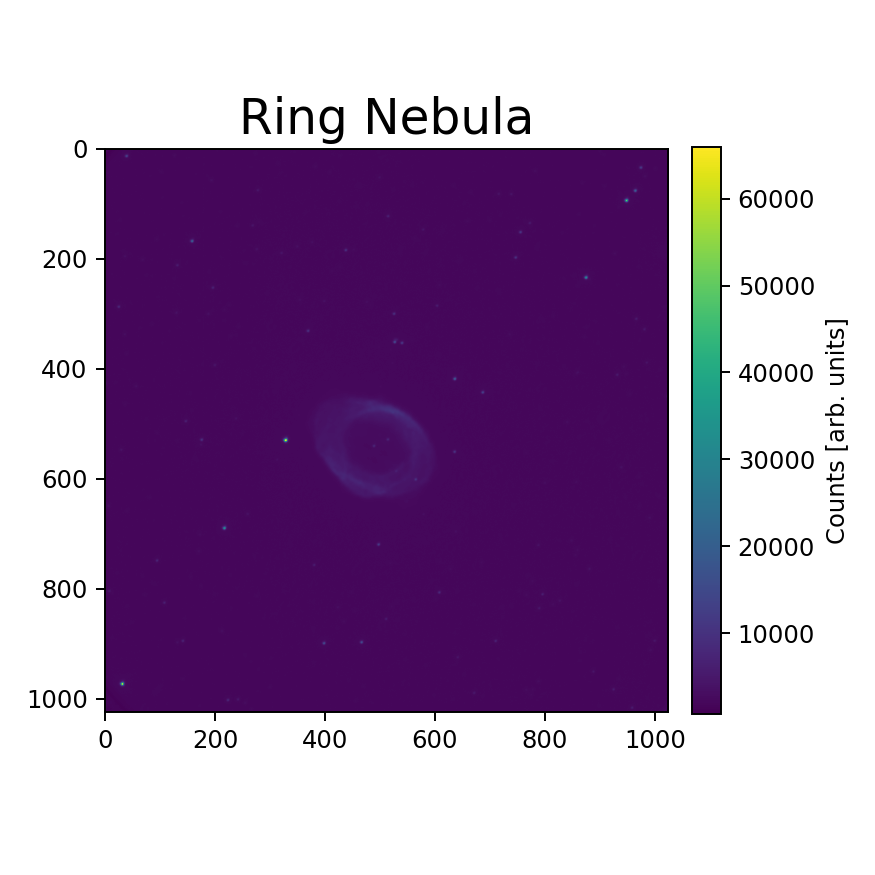

In [57]:
# let's plot the image
plt.figure(figsize=[5,5])
im = plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04,label='Counts [arb. units]')
plt.tight_layout()
plt.title('Ring Nebula',fontsize=20)
plt.show()

In [58]:
low  = np.percentile(image, 20) 
high = np.percentile(image, 99.5)

# Adding Some Fancy Visuals :)

<IPython.core.display.Javascript object>


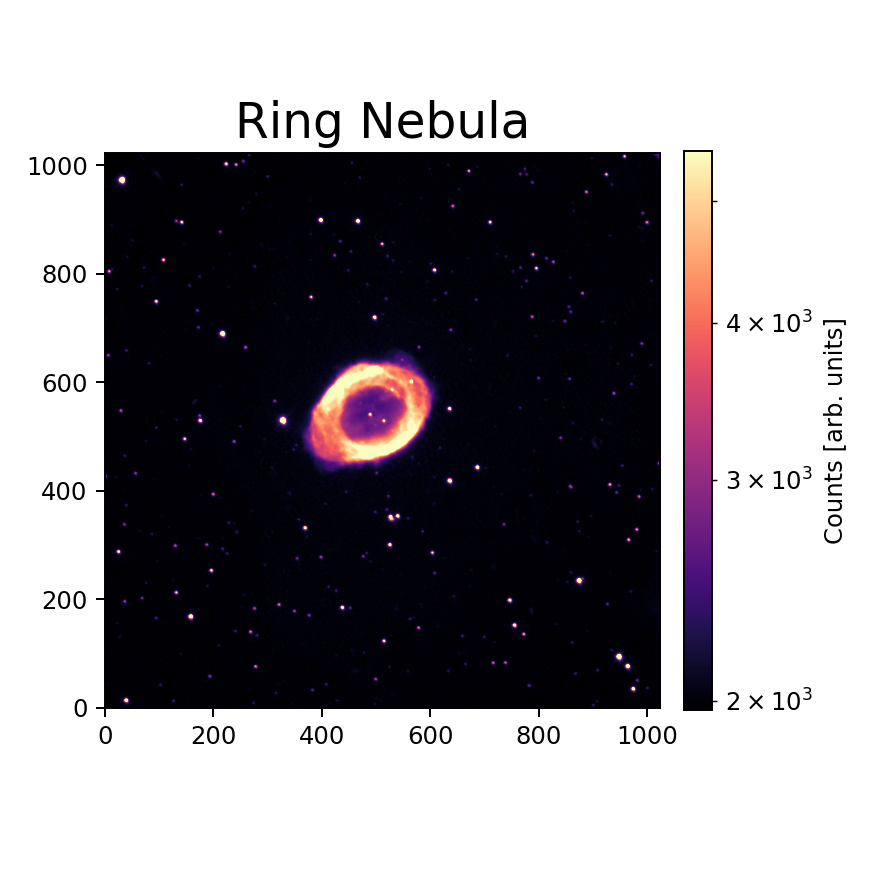

/Users/jacobpilawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  after removing the cwd from sys.path.


In [59]:
# let's plot the image
plt.figure(figsize=[5,5])
im = plt.imshow(image, vmin=low,vmax=high,norm=mpl.colors.LogNorm(),
          origin='lower',cmap='magma')
plt.colorbar(im,fraction=0.046, pad=0.04,label='Counts [arb. units]')
plt.tight_layout()
plt.title('Ring Nebula',fontsize=20)
plt.show()

<IPython.core.display.Javascript object>


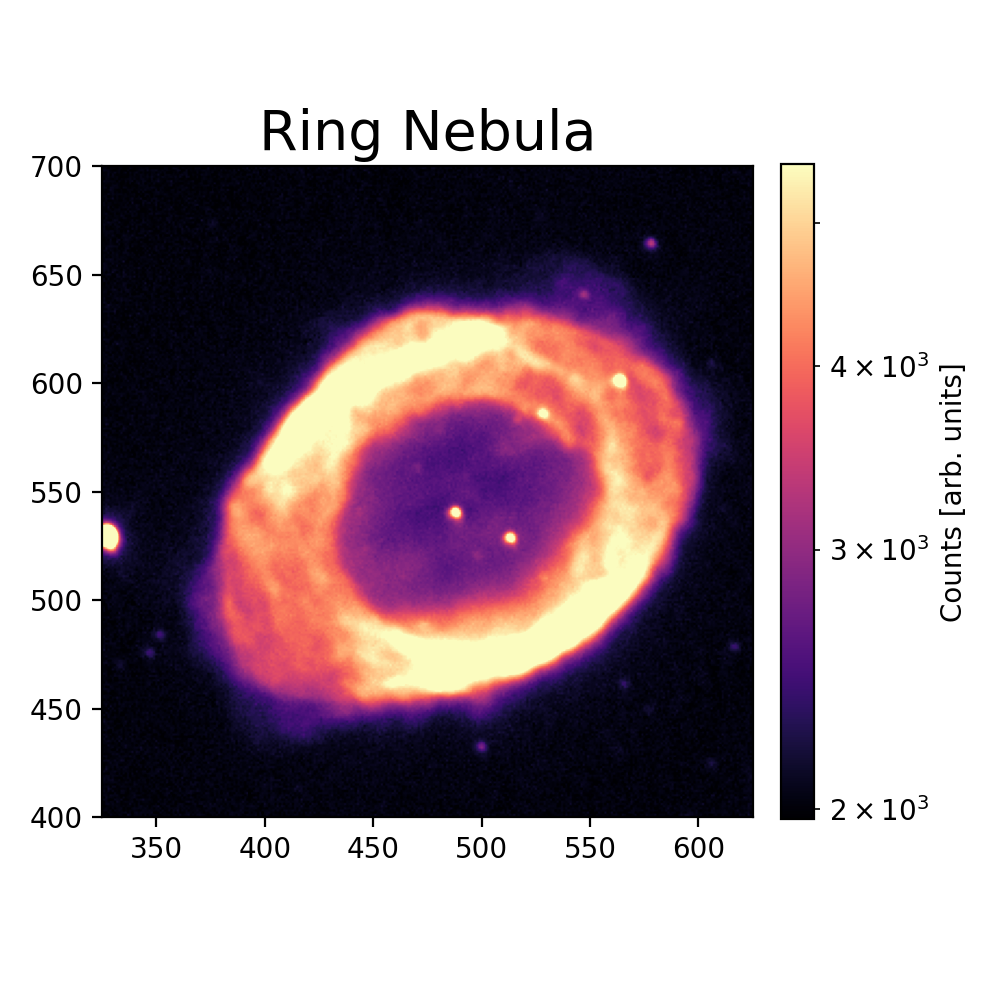

/Users/jacobpilawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  after removing the cwd from sys.path.


In [48]:
# let's plot the image
plt.figure(figsize=[5,5])
im = plt.imshow(image, vmin=low,vmax=high,norm=mpl.colors.LogNorm(),
          origin='lower',cmap='magma')
plt.colorbar(im,fraction=0.046, pad=0.04,label='Counts [arb. units]')
plt.xlim(325,625)
plt.ylim(400,700)
plt.tight_layout()
plt.title('Ring Nebula',fontsize=20)
plt.show()

# Image Stretching and Scaling

See: https://docs.astropy.org/en/stable/visualization/normalization.html

In [49]:
from astropy.visualization import (ZScaleInterval,MinMaxInterval, LogStretch, LinearStretch,
                                   ImageNormalize)

<IPython.core.display.Javascript object>


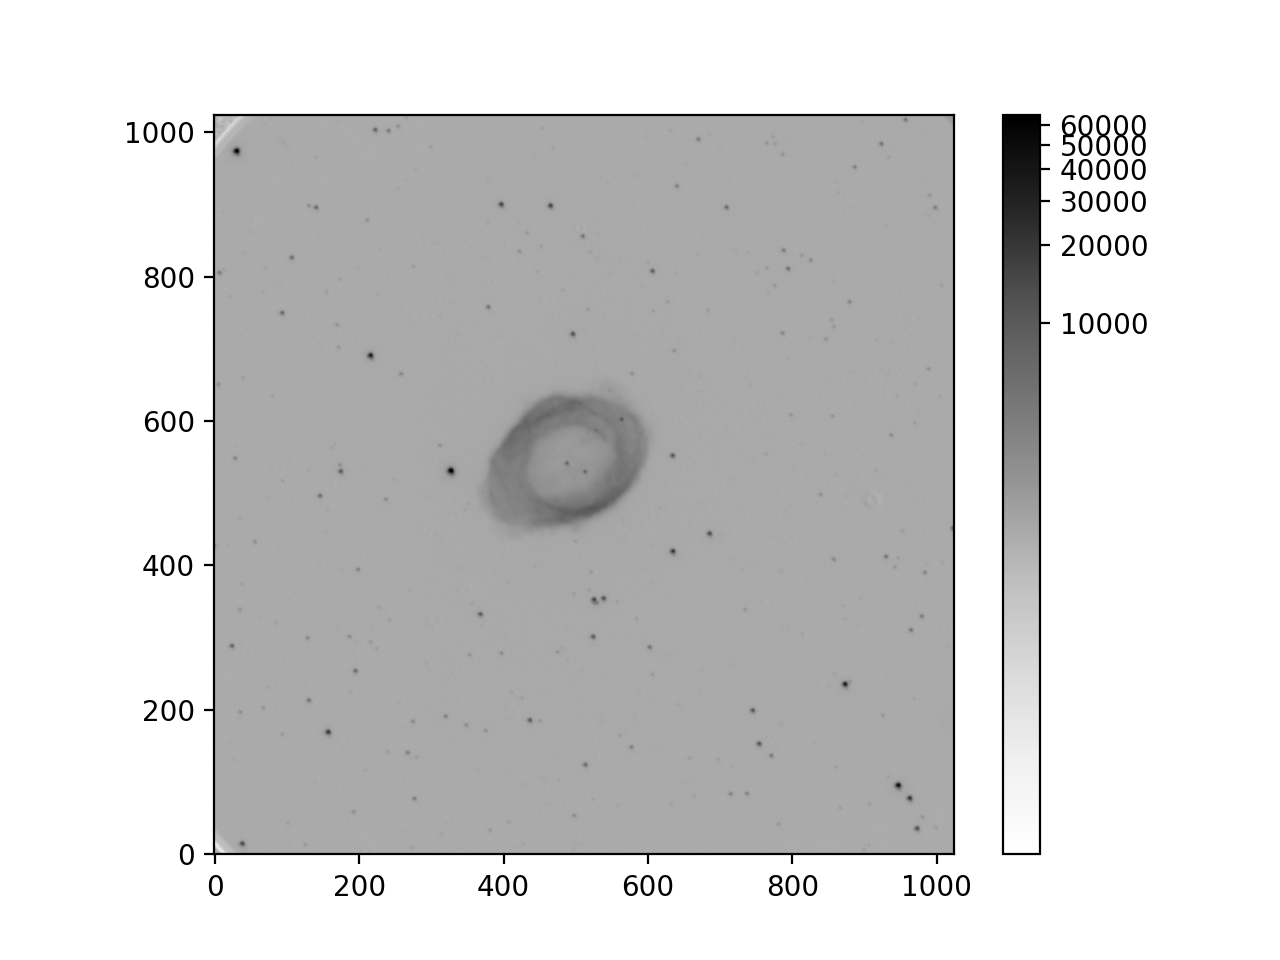

In [50]:
# Create an ImageNormalize object
norm = ImageNormalize(image, interval=MinMaxInterval(),
                      stretch=LogStretch())

# or equivalently using positional arguments
# norm = ImageNormalize(image, MinMaxInterval(), SqrtStretch())

# Display the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(image, origin='lower', norm=norm, cmap='Greys')
fig.colorbar(im)

# An alternate way to read files that I really like, and you might see:

In [30]:
with fits.open(file_name) as f:
    data = f[0].data
    f.close()

In [33]:
plt.imshow(data)